**Problem Statement** :

Using Deep Learning techniques, predict the coordinates (x,y) of a pixel which has a value of
255 for 1 pixel in a given 50x50 pixel grayscale image and all other pixels are 0. The pixel with a
value of 255 is randomly assigned. You may generate a dataset as required for solving the
problem. Please explain your rationale behind dataset choices.

# **Importing necessary libraries**

In [23]:
!pip install tensorflow

In [24]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models

# **Generating the DataSet**

In [25]:
def generate_dataset(samples):
  images = []
  labels = []
  for _ in range(samples):
    image = np.zeros((50,50))  #creating a 50x50 image with all zero values
    x = np.random.randint(50)  #assigning a random coordinate for x
    y = np.random.randint(50)  #assigning a random cooradinate for y

    image[x, y] = 255       # SETTING PIXEL VALUE TO 255

    images.append(image)
    labels.append([x/50, y/50])
  return np.array(images), np.array(labels)

# **Generate training and validation data**

In [26]:
train_images, train_labels = generate_dataset(8000)
val_images, val_labels = generate_dataset(2000)

# **Data Preprocessing**

In [27]:
train_images = train_images[..., np.newaxis]/255.0

#The np.newaxis operation is used to add a new axis to the array train_images

val_images = val_images[..., np.newaxis]/255.0

# **Creating Model Architecture**

In [28]:
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation = 'relu', input_shape=(50,50,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(2)
])


#this give 2 output nuerons for x and y coordinaets

# **Compiling the Model**

In [29]:
model.compile(optimizer='adam', loss='mse') #using adam as optimizer

# **Training the model**

In [30]:
history = model.fit(train_images, train_labels, epochs=10, batch_size = 32, validation_data=(val_images, val_labels))

Epoch 1/10
250/250 [==============================] - 45s 175ms/step - loss: 0.0141 - val_loss: 9.9881e-04
Epoch 2/10
250/250 [==============================] - 27s 110ms/step - loss: 5.9637e-04 - val_loss: 5.0297e-04
Epoch 3/10
250/250 [==============================] - 25s 101ms/step - loss: 3.4849e-04 - val_loss: 2.6072e-04
Epoch 4/10
250/250 [==============================] - 27s 108ms/step - loss: 2.3525e-04 - val_loss: 2.4133e-04
Epoch 5/10
250/250 [==============================] - 26s 104ms/step - loss: 2.6780e-04 - val_loss: 2.9663e-04
Epoch 6/10
250/250 [==============================] - 26s 103ms/step - loss: 3.5153e-04 - val_loss: 1.4338e-04
Epoch 7/10
250/250 [==============================] - 25s 100ms/step - loss: 1.1556e-04 - val_loss: 8.3421e-05
Epoch 8/10
250/250 [==============================] - 25s 101ms/step - loss: 1.5923e-04 - val_loss: 9.3351e-05
Epoch 9/10
250/250 [==============================] - 24s 96ms/step - loss: 1.1964e-04 - val_loss: 1.6352e-04
Epoch 

# **Evaluation**

In [31]:
test_images, test_labels = generate_dataset(1000)
test_images = test_images[..., np.newaxis]/255.0
loss = model.evaluate(test_images, test_labels)

print("TEST LOSS:", loss)

32/32 [==============================] - 1s 36ms/step - loss: 1.5990e-04
TEST LOSS: 0.00015990044630598277


# **Prediction**

In [32]:
predicted_labels = model.predict(test_images)

32/32 [==============================] - 2s 49ms/step


**Plotting the orginal co-ordinates and the predicted co-oredinates using scatter plot**

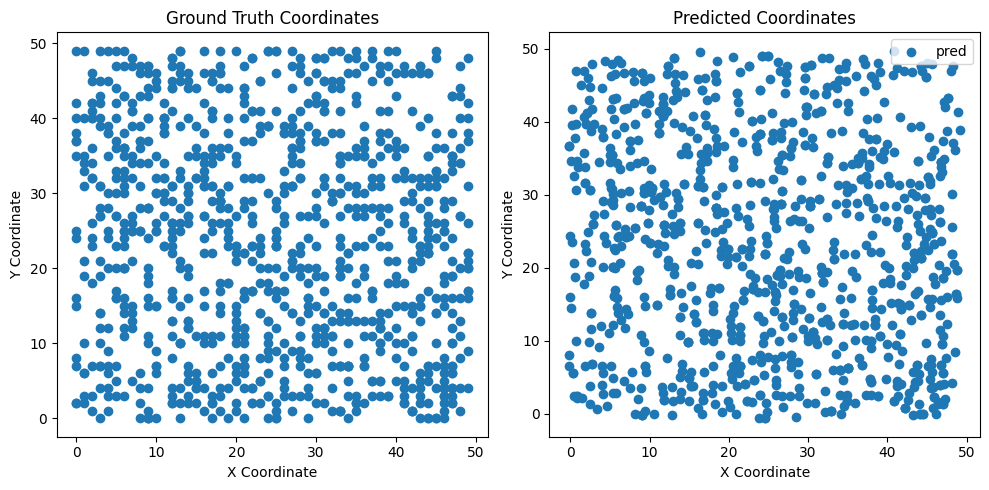

In [35]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(test_labels[:, 1] * 50, test_labels[:, 0] * 50, label='Ground Truth')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title('Ground Truth Coordinates')

plt.subplot(1, 2, 2)

plt.scatter(predicted_labels[:, 1] * 50, predicted_labels[:, 0] * 50, label='pred')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title('Predicted Coordinates')
plt.legend()
plt.tight_layout()
plt.show()



**Overlaid Plots: Overlaying the actual and predicted scatter plots on the same axes.**

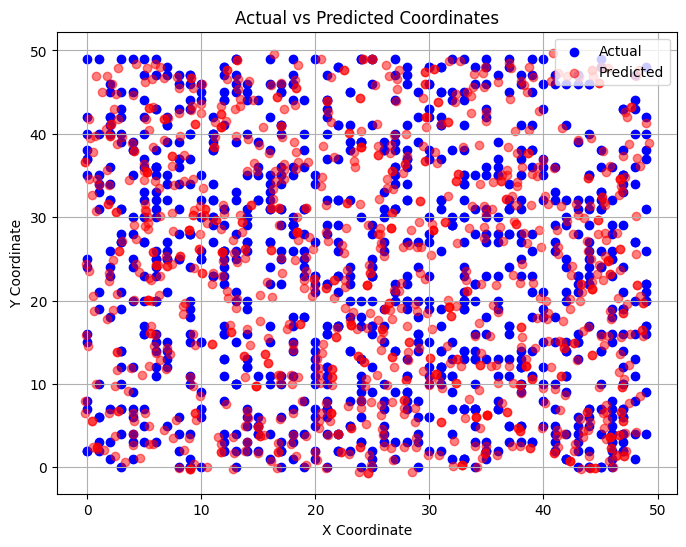

In [37]:

actual_x = test_labels[:, 1] * 50
actual_y = test_labels[:, 0] * 50

predicted_x = predicted_labels[:, 1] * 50
predicted_y = predicted_labels[:, 0] * 50

# Plotting actual and predicted coordinates

plt.figure(figsize=(8, 6))
plt.scatter(actual_x, actual_y, label='Actual', color='blue')

plt.scatter(predicted_x, predicted_y, label='Predicted', color='red', alpha=0.5)

plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')

plt.title('Actual vs Predicted Coordinates')
plt.legend()
plt.grid(True)
plt.show()

# **computing the R2 score using scikit-learn**

In [38]:
from sklearn.metrics import r2_score

r2_x = r2_score(actual_x, predicted_x)

r2_y = r2_score(actual_y, predicted_y)

overall_r2 = (r2_x + r2_y)/2

print("R-squared score for X-coordinate:", r2_x)
print("R-squared score for Y-coordinate:", r2_y)
print("Overall R-squared score:", overall_r2)


R-squared score for X-coordinate: 0.9983581366537255
R-squared score for Y-coordinate: 0.9977617720462434
Overall R-squared score: 0.9980599543499844


In regression tasks, an
𝑅2 score close to 1 indicates that the model's predictions closely match the actual values, and the model captures a large proportion of the variability in the data. Therefore, R2 scores of 0.999 for the x-coordinate and 0.998 for the y-coordinate, along with an overall score of 0.999, suggest that the model is performing exceptionally well for the task of predicting coordinates.